In [1]:
!nvidia-smi

Thu Oct 16 06:45:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

# Change this path to your preferred Drive folder
DRIVE_OUTPUT_DIR = "/content/drive/MyDrive/yolo_outputs/data_maini9ng"
os.makedirs(DRIVE_OUTPUT_DIR, exist_ok=True)
print("YOLO outputs will be saved here:", DRIVE_OUTPUT_DIR)


Mounted at /content/drive
YOLO outputs will be saved here: /content/drive/MyDrive/yolo_outputs/data_maini9ng


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
import os
import json
import cv2
from typing import List, Dict, Tuple
from google import genai
from google.genai import types

In [8]:
!ls

drive  VegMining-5


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(5)
dataset = version.download("")


loading Roboflow workspace...
loading Roboflow project...


In [10]:
!ls {dataset.location}

!cat {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 14
names: ['defected_Potato', 'defected_bitter_gourd', 'defected_brinjal', 'defected_capsicum', 'defected_onion', 'defected_pointed_gourd', 'defected_tomato', 'fresh_bitter_gourd', 'fresh_brinjal', 'fresh_capsicum', 'fresh_onion', 'fresh_pointed_gourd', 'fresh_potato', 'fresh_tomato']

roboflow:
  workspace: rakib151p
  project: vegmining-i6j82
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/rakib151p/vegmining-i6j82/dataset/5

In [11]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 209MB/s]
New https://pypi.org/project/ultralytics/8.3.214 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/VegMining-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch10560.jpg
confusion_matrix_normalized.png			    train_batch10561.jpg
confusion_matrix.png				    train_batch10562.jpg
events.out.tfevents.1760597311.744c103e13b2.1337.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


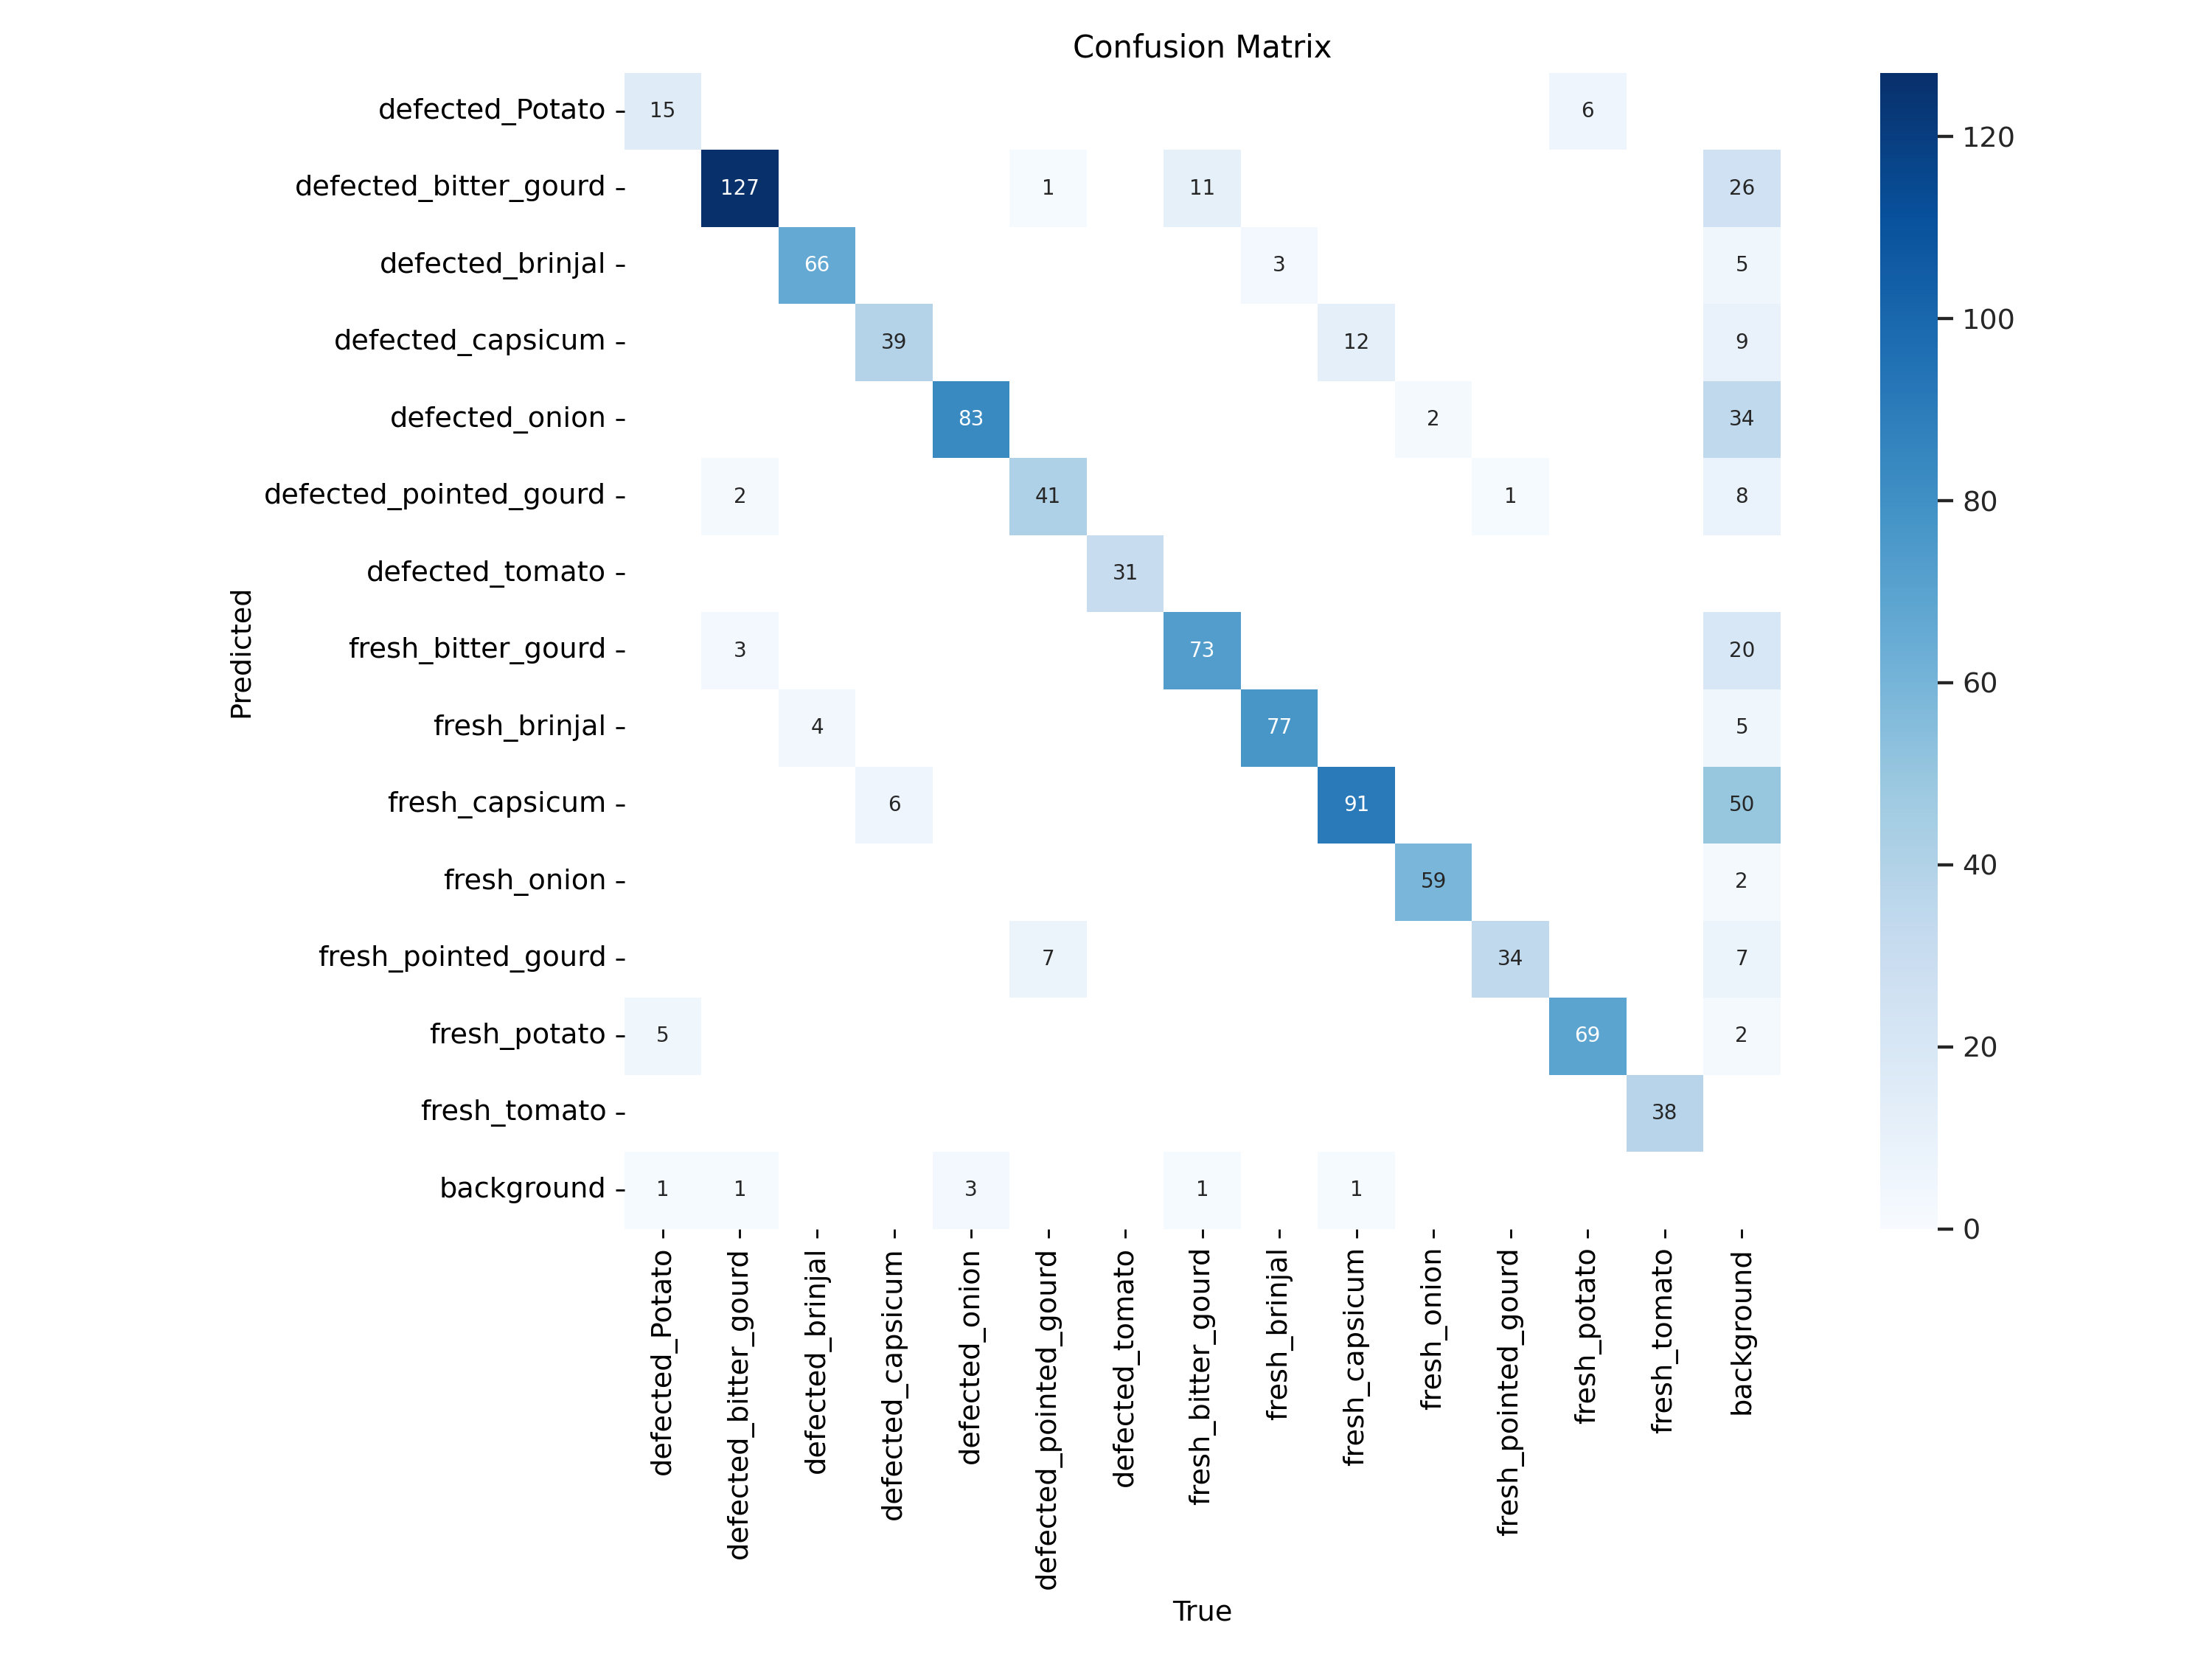

In [13]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

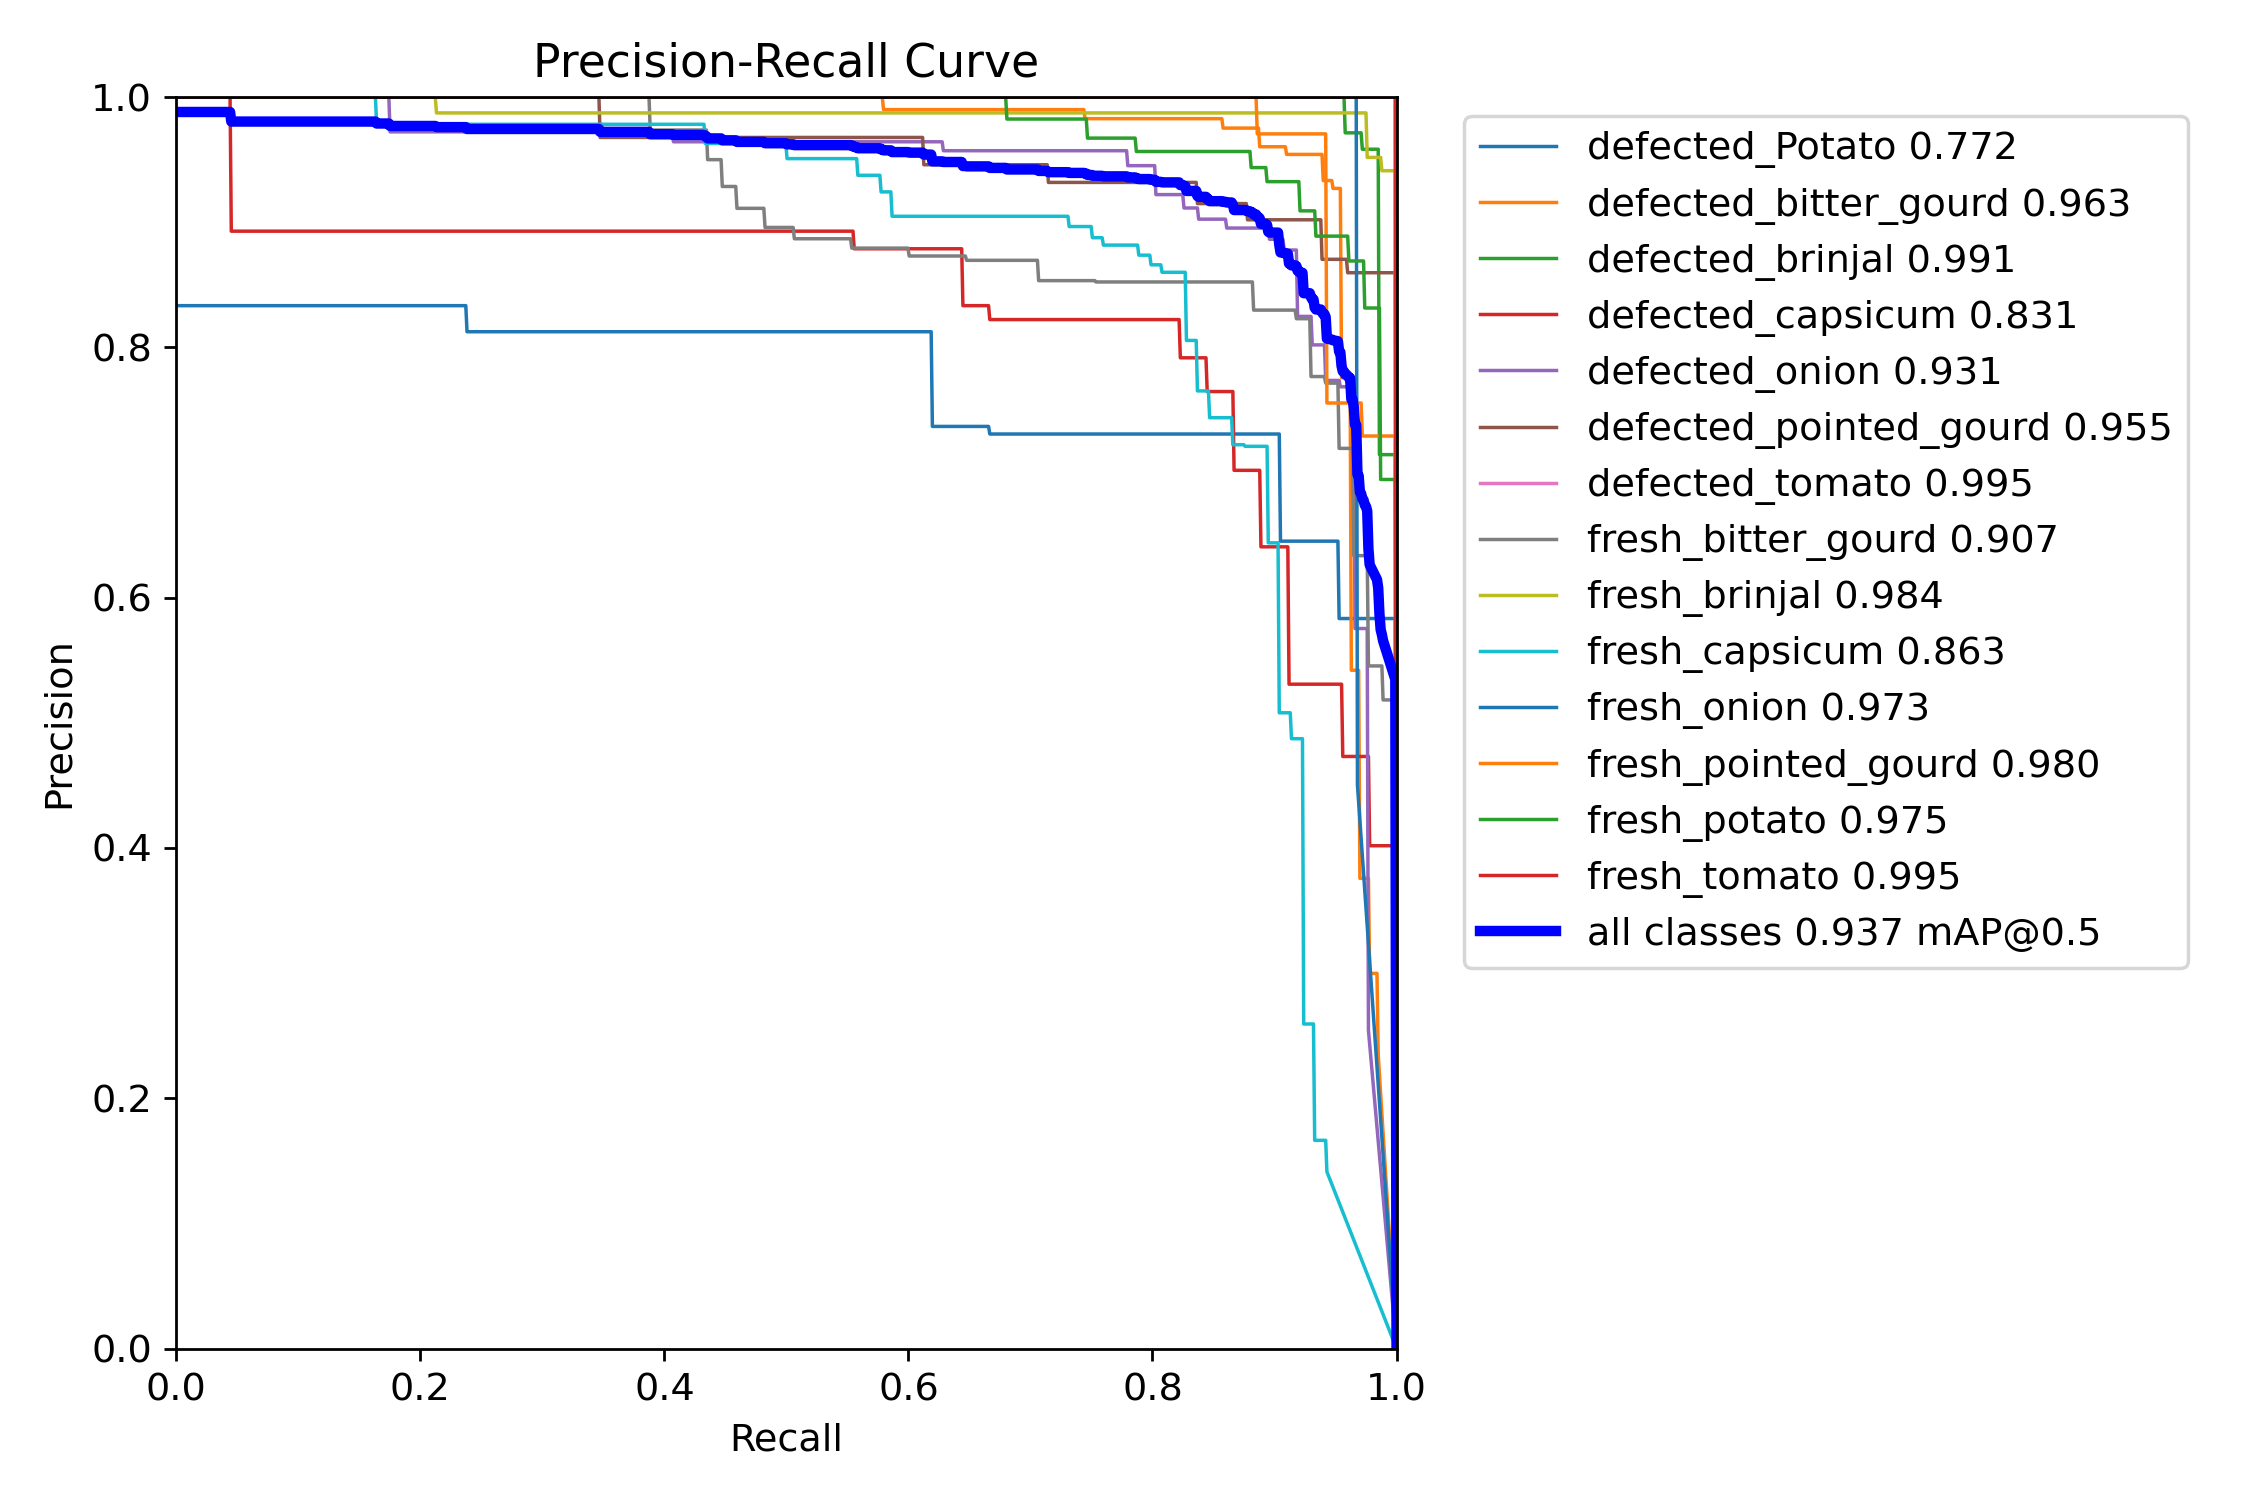

In [19]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

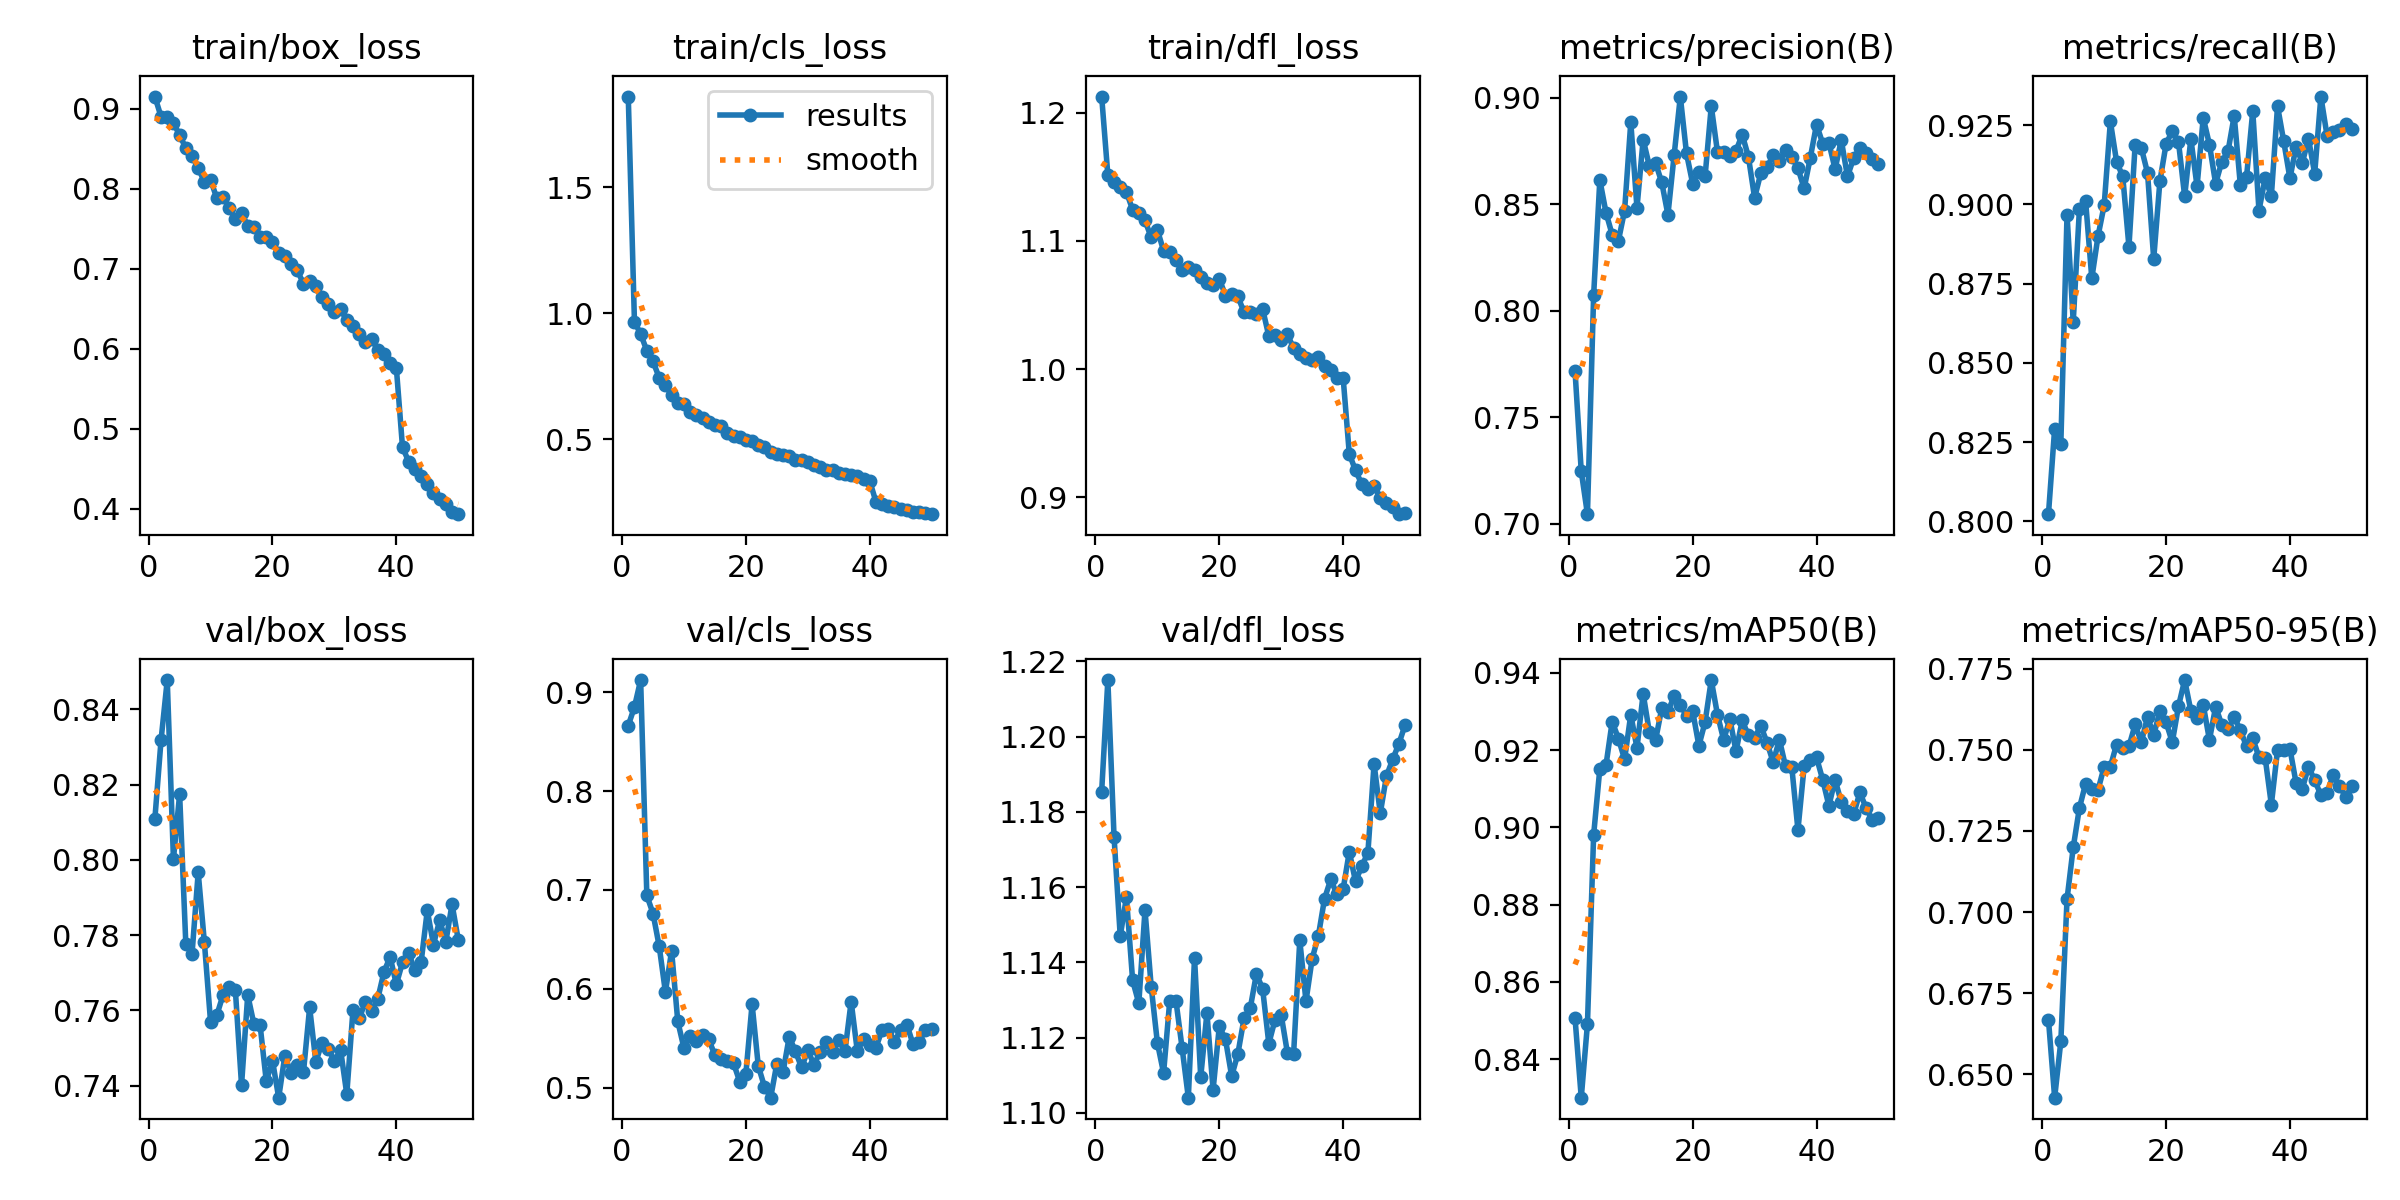

In [14]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

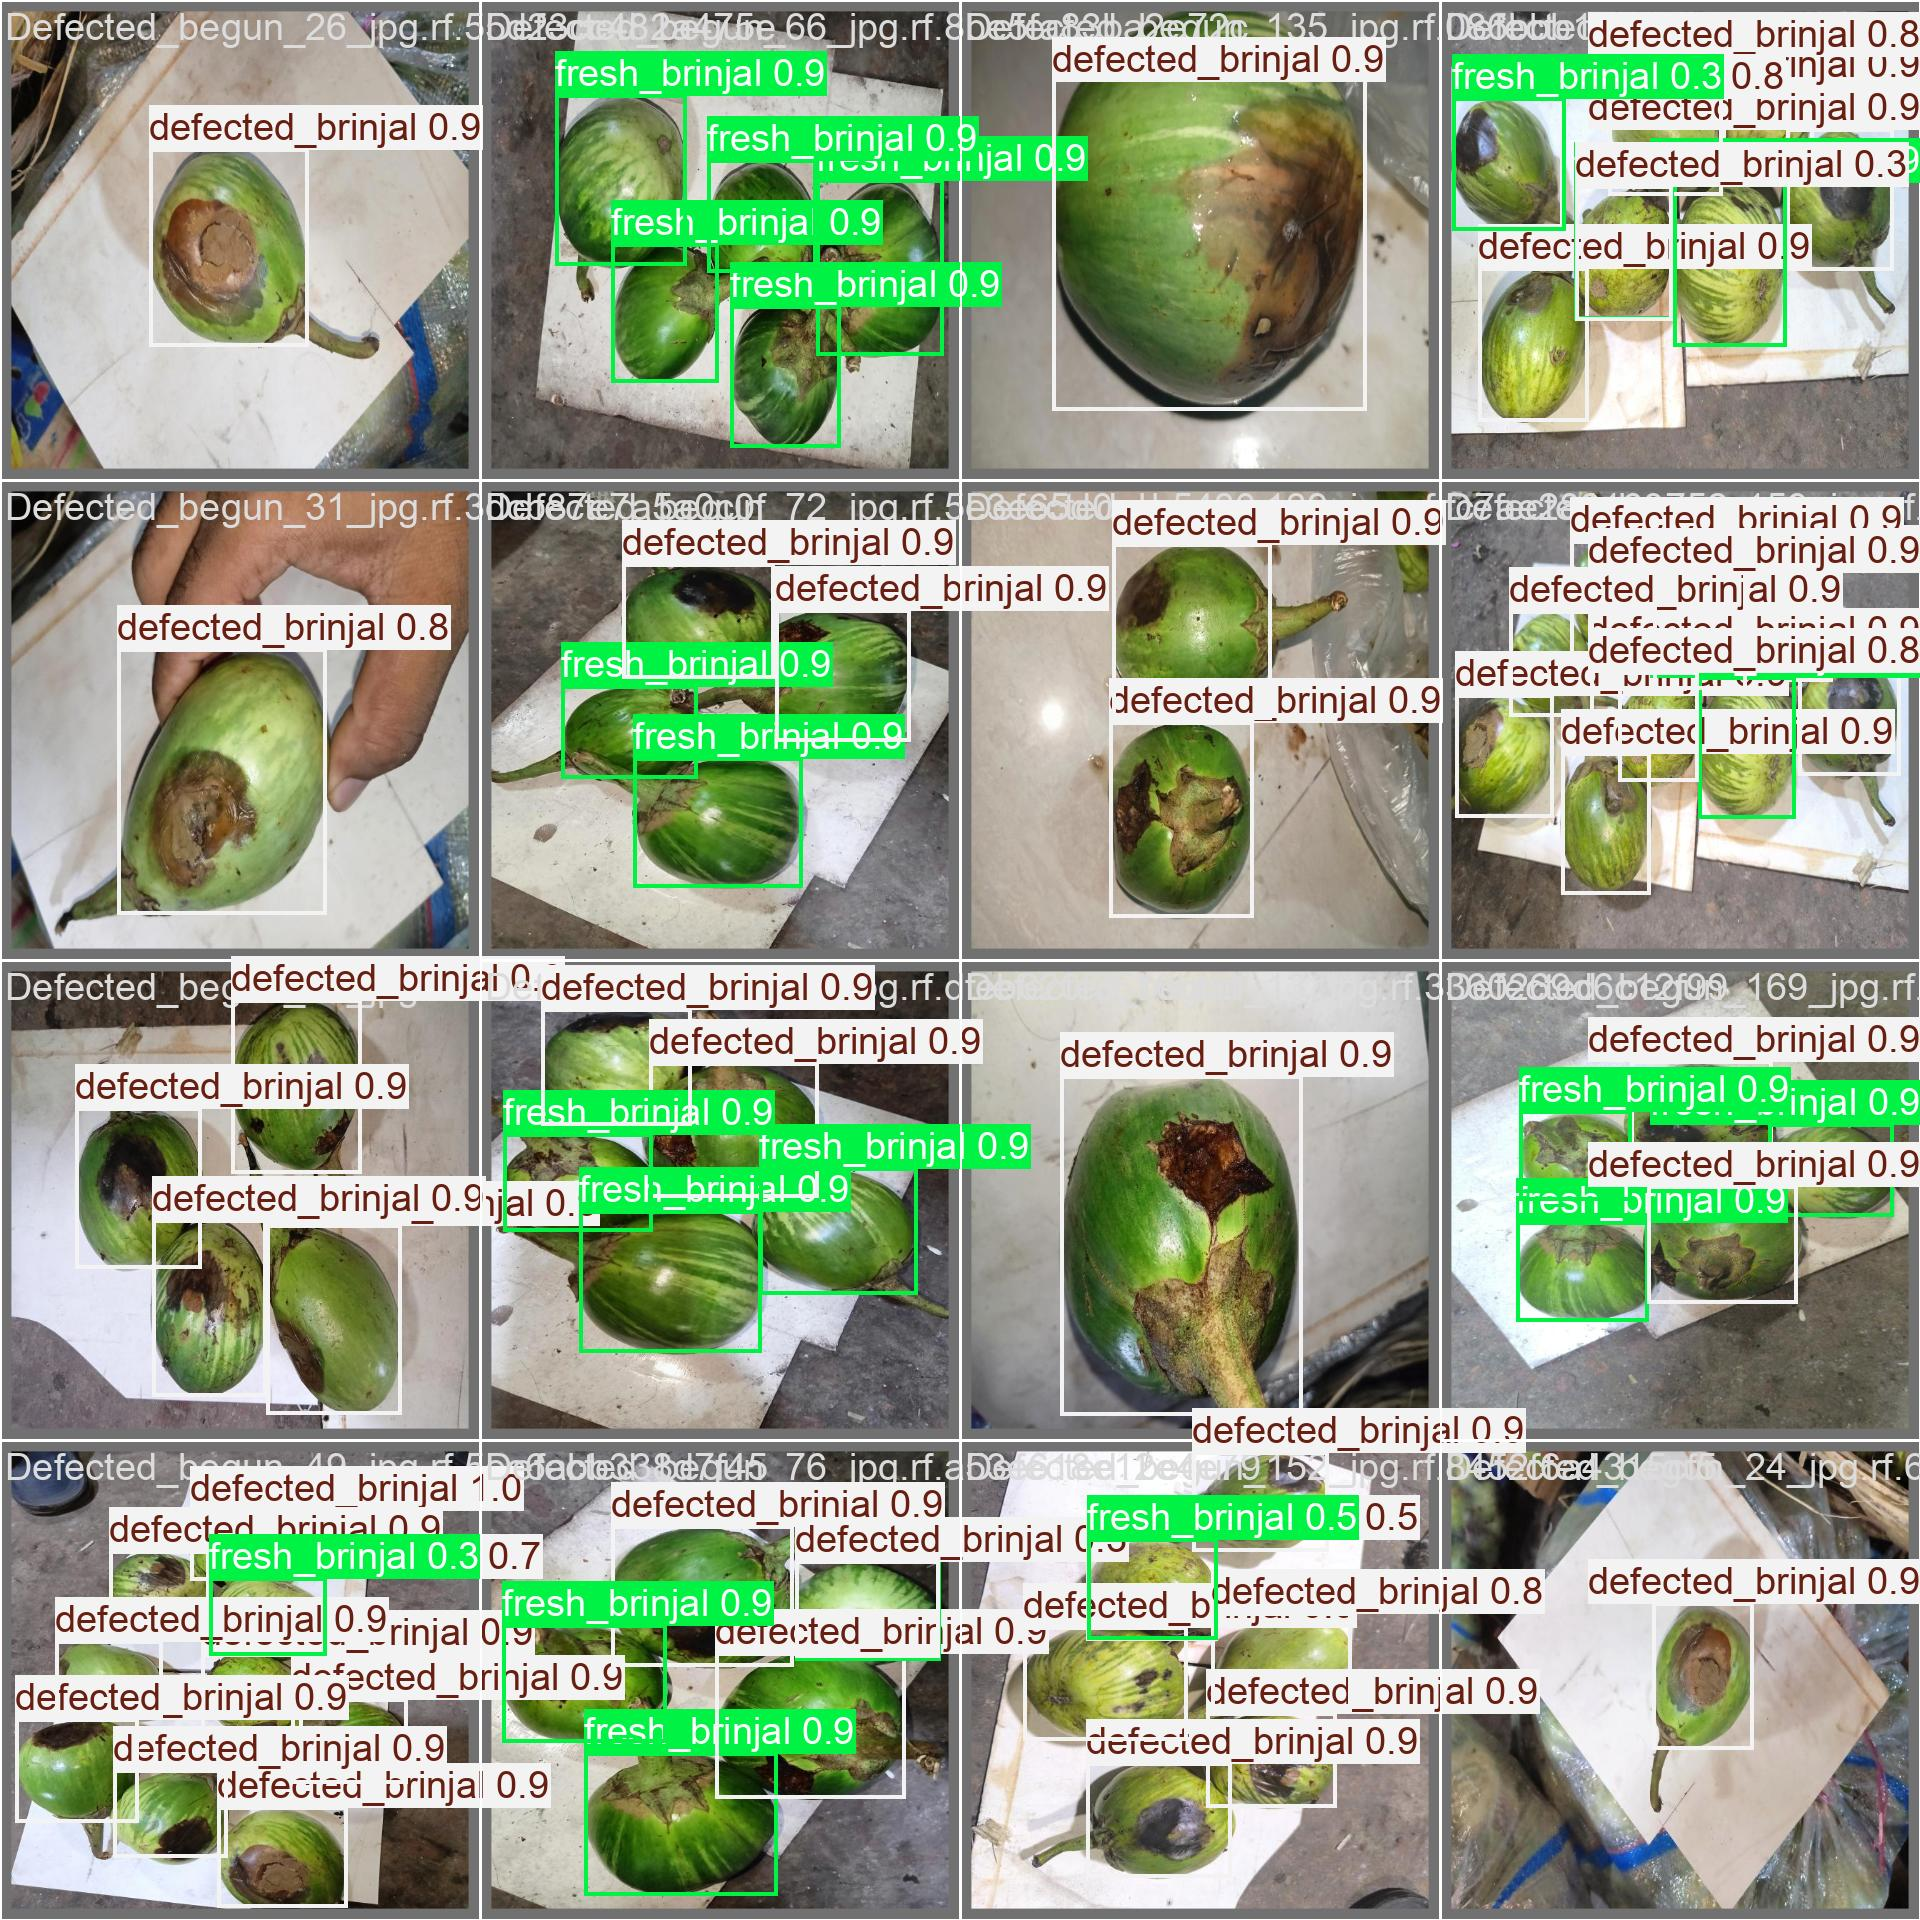

In [15]:
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

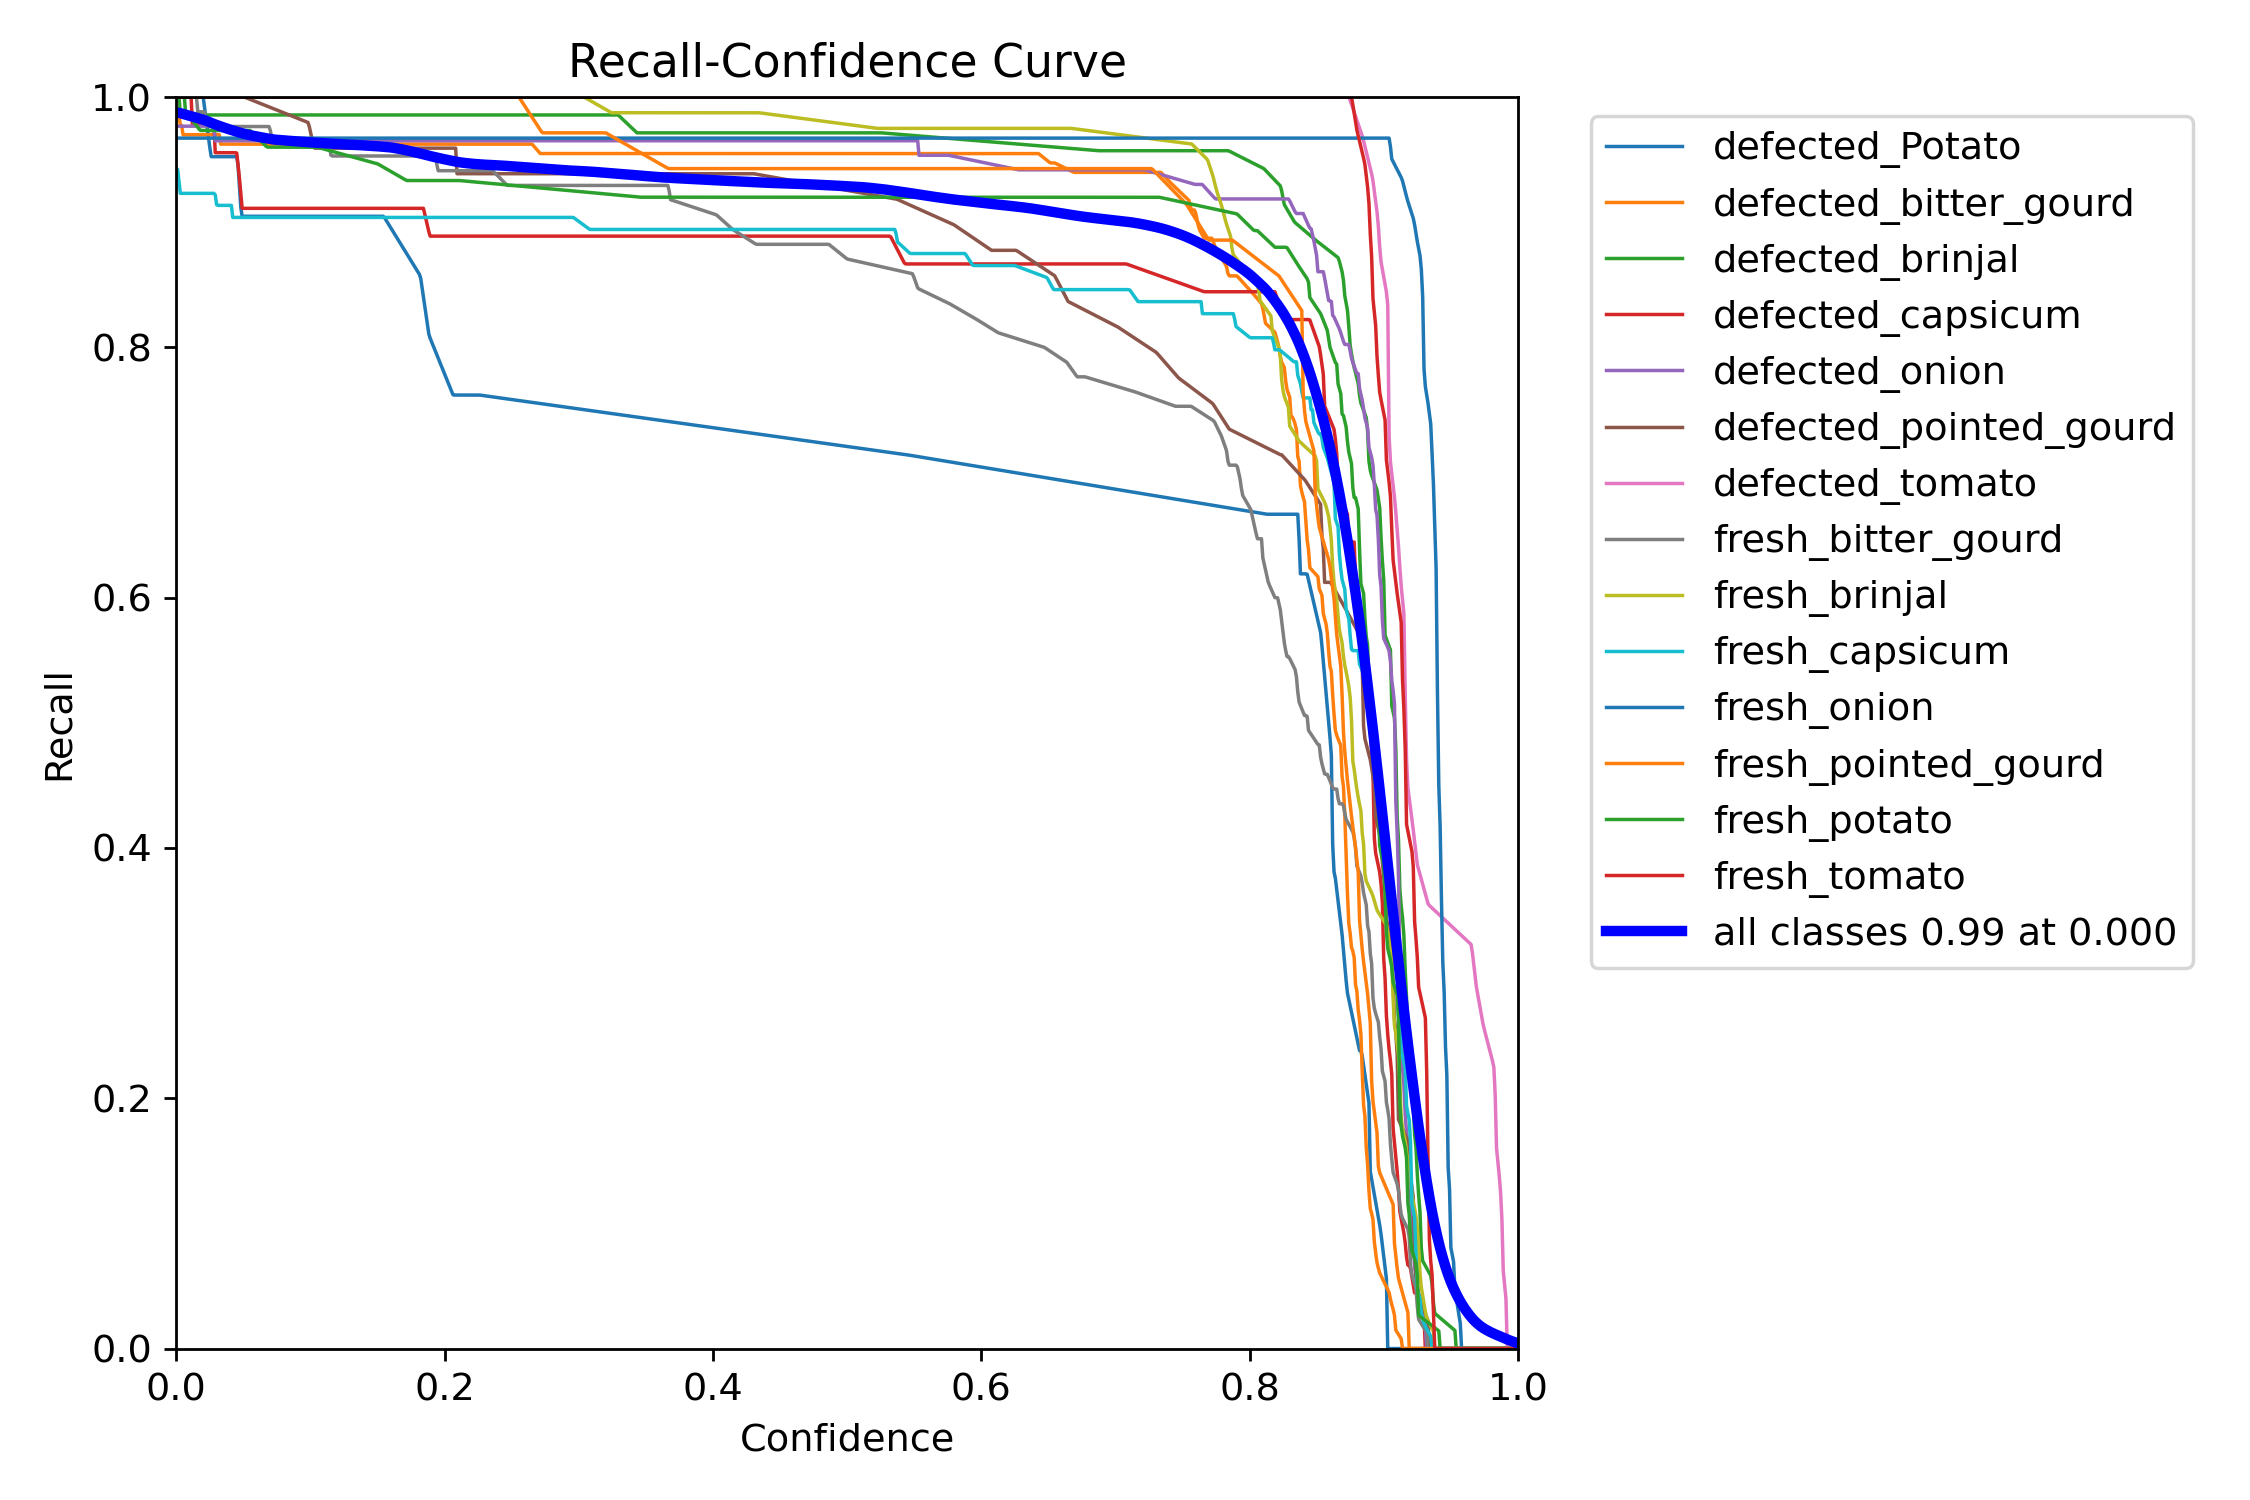

In [20]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

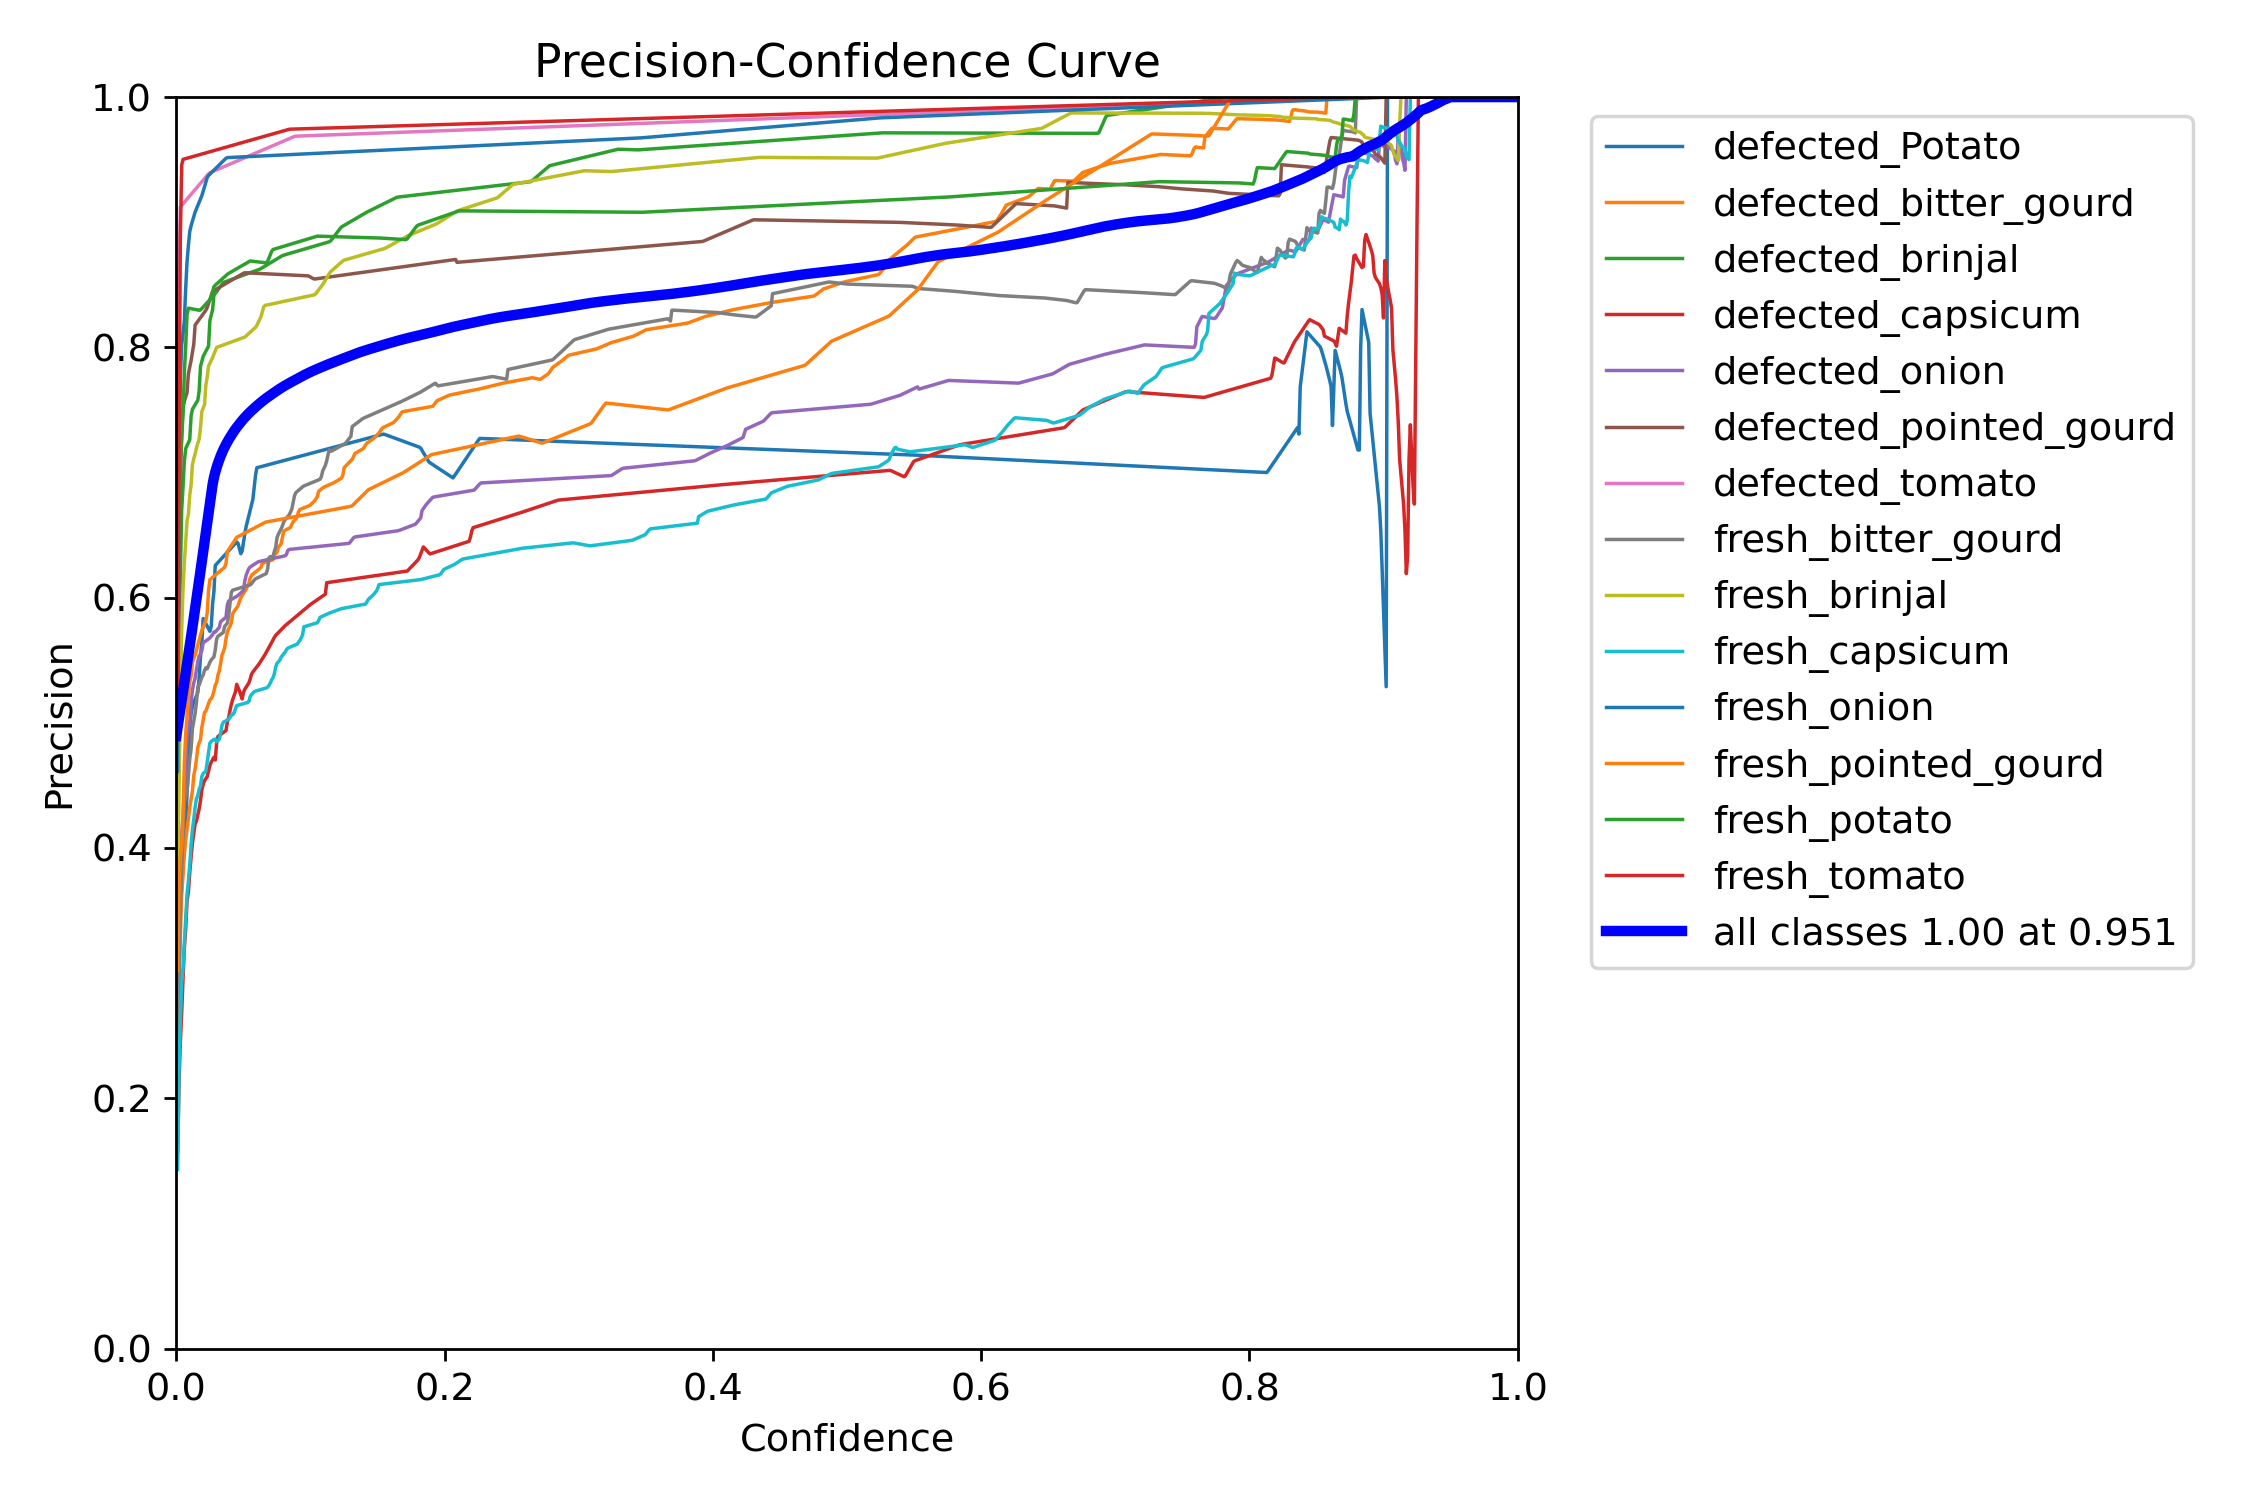

In [21]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

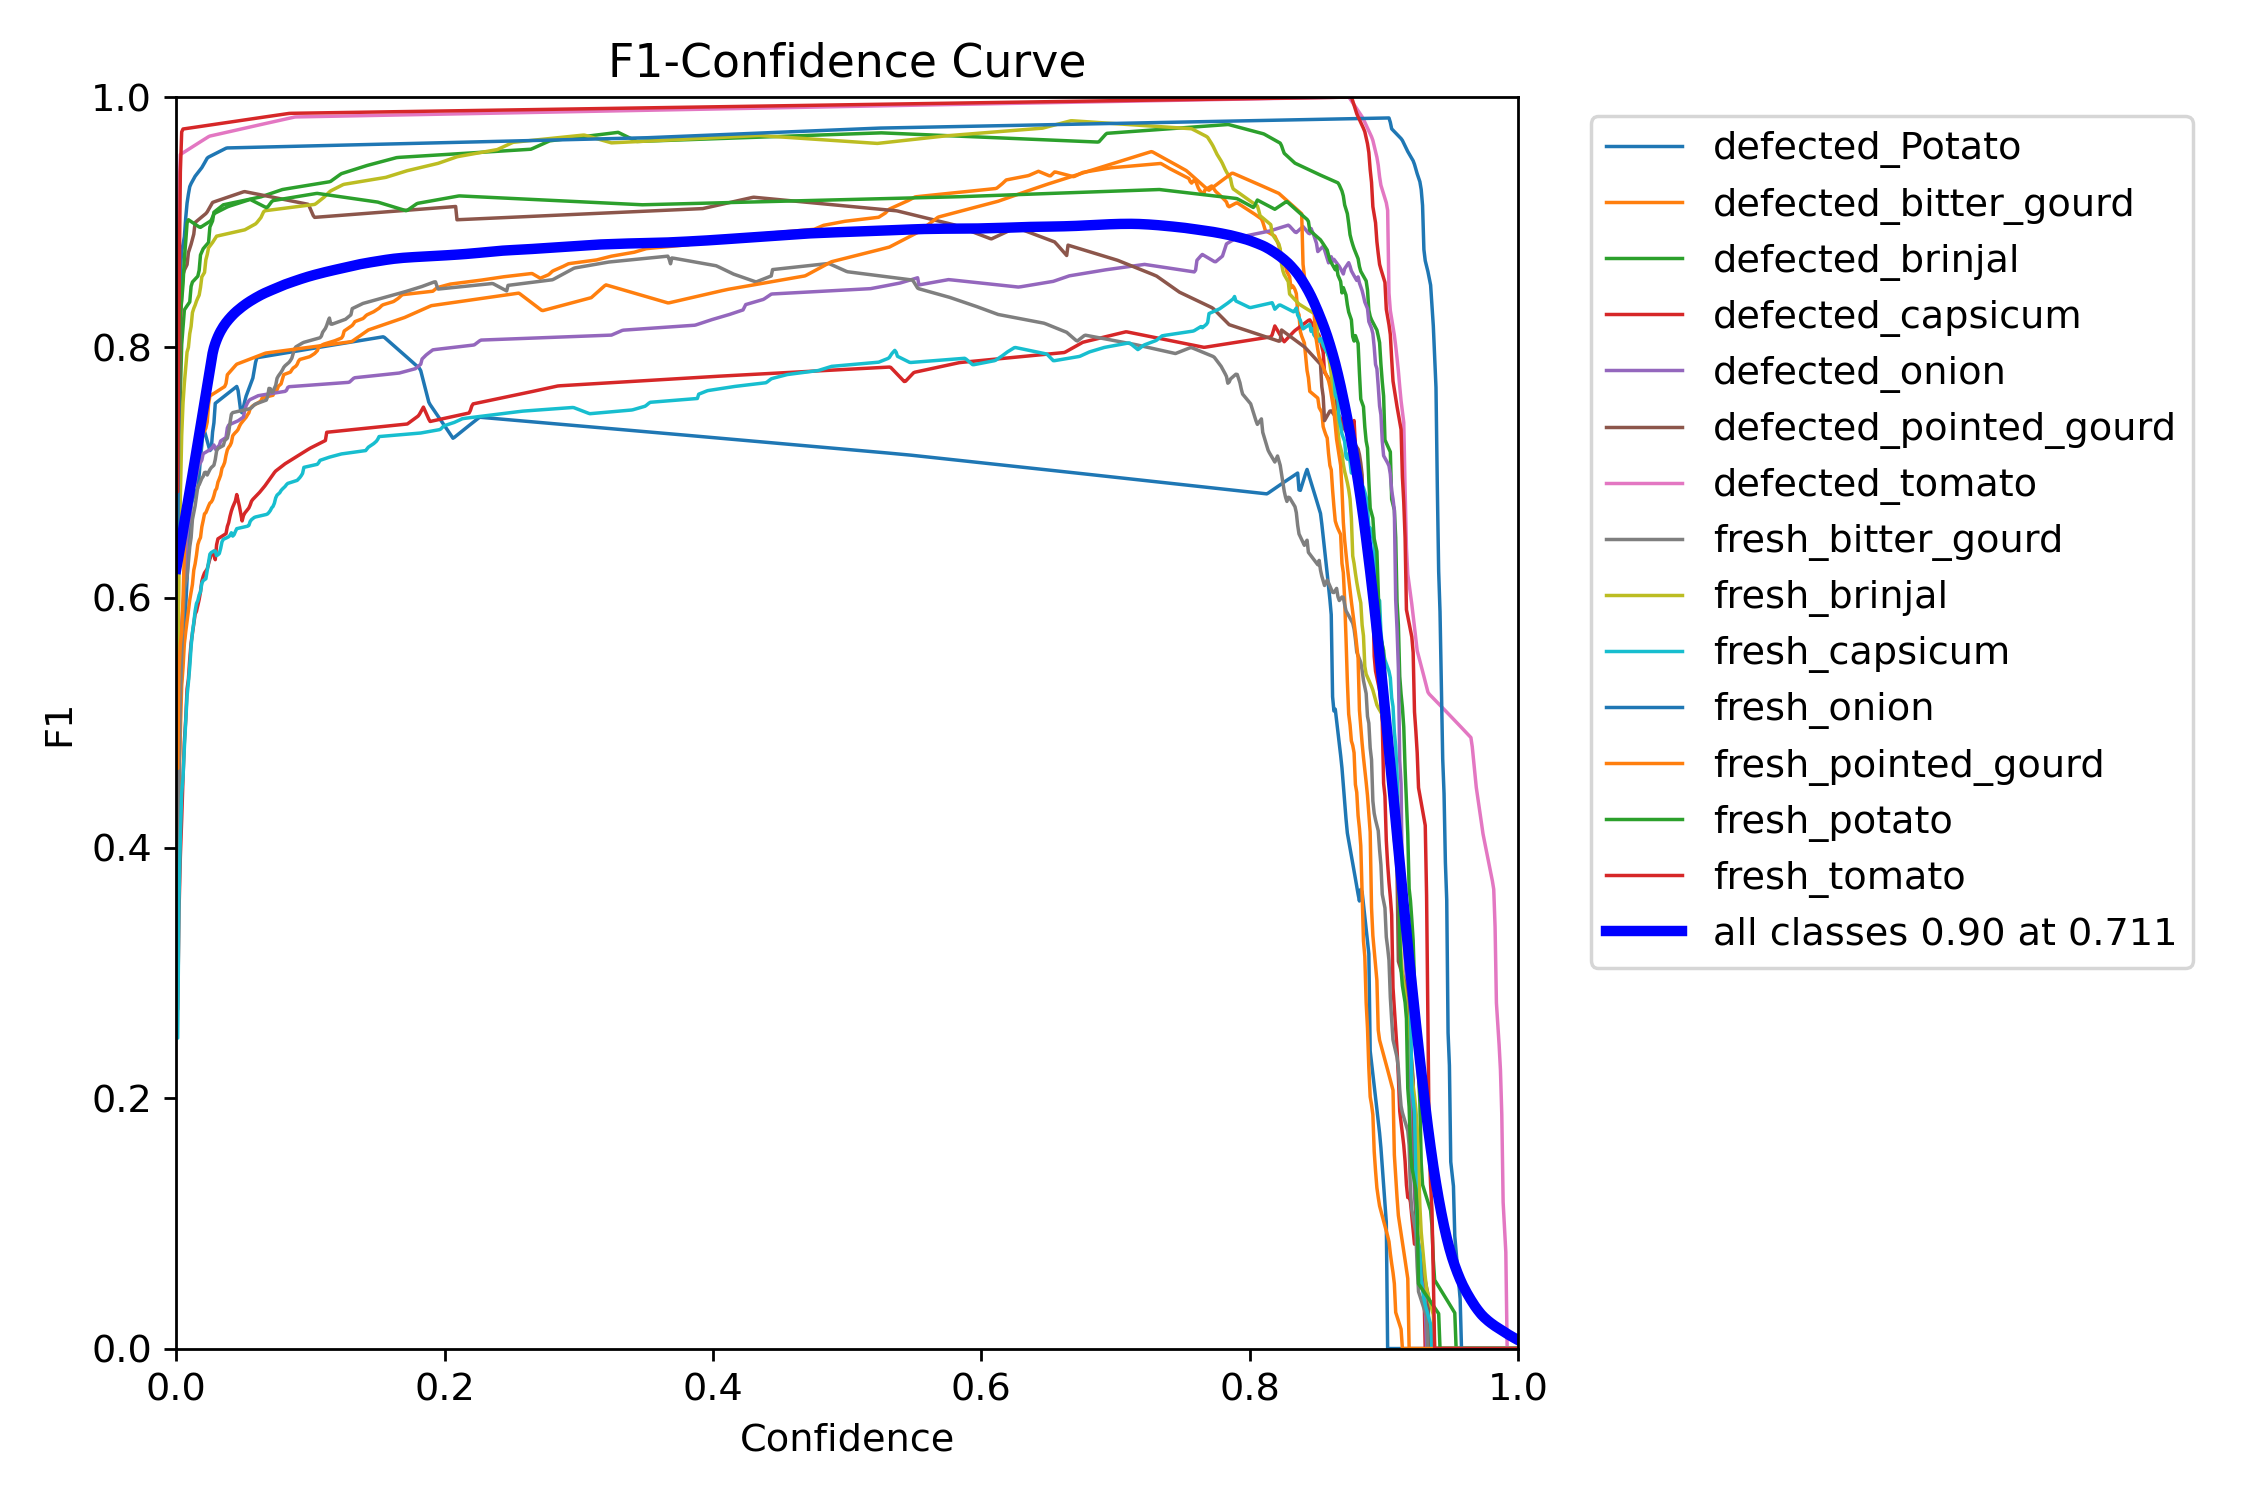

In [22]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

In [16]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/VegMining-5/valid/labels.cache... 406 images, 0 backgrounds, 0 corrupt: 100% 406/406 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:07<00:00,  3.35it/s]
                   all        406        913      0.896      0.903      0.937       0.77
       defected_Potato         17         21      0.706      0.688      0.772      0.616
 defected_bitter_gourd         63        133      0.945       0.94      0.963      0.764
      defected_brinjal         28         70      0.971      0.957      0.991      0.846
     defected_capsicum         25         45      0.757      0.867      0.831      0.696
        defected_onion         12         86      0.794      0.942       0.93      0.676
defected_pointed_gourd         28         49      

In [17]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,131,002 parameters, 0 gradients, 28.5 GFLOPs

image 1/204 /content/VegMining-5/test/images/1758873619161_jpg.rf.5eabc632b4480475eea4dc4d197c2a44.jpg: 640x640 3 fresh_capsicums, 16.3ms
image 2/204 /content/VegMining-5/test/images/1758873619220_jpg.rf.b3667bc641c85b8d1ebd941a90b59cff.jpg: 640x640 1 defected_onion, 7 fresh_capsicums, 1 fresh_potato, 16.3ms
image 3/204 /content/VegMining-5/test/images/1758873619415_jpg.rf.9a86fef93a15be38a79991b5357a128b.jpg: 640x640 6 fresh_capsicums, 16.2ms
image 4/204 /content/VegMining-5/test/images/Defected_begun_109_jpg.rf.8488c4b0cae5743883f21df133c04054.jpg: 640x640 1 fresh_brinjal, 16.2ms
image 5/204 /content/VegMining-5/test/images/Defected_begun_112_jpg.rf.724a587680a3723fd5fcee9b03e04b4e.jpg: 640x640 1 defected_brinjal, 16.3ms
image 6/204 /content/VegMining-5/test/images/Defected_begun_154_jpg.rf.6cb4e791c823fc2a6931f4cd44a6b1

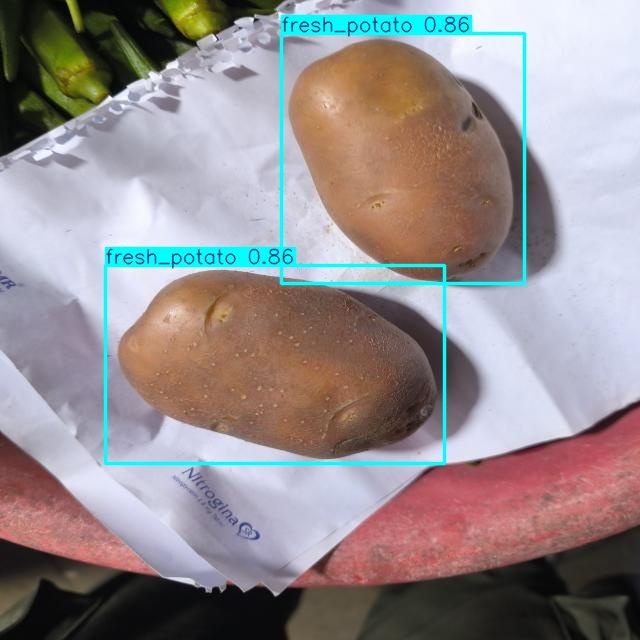

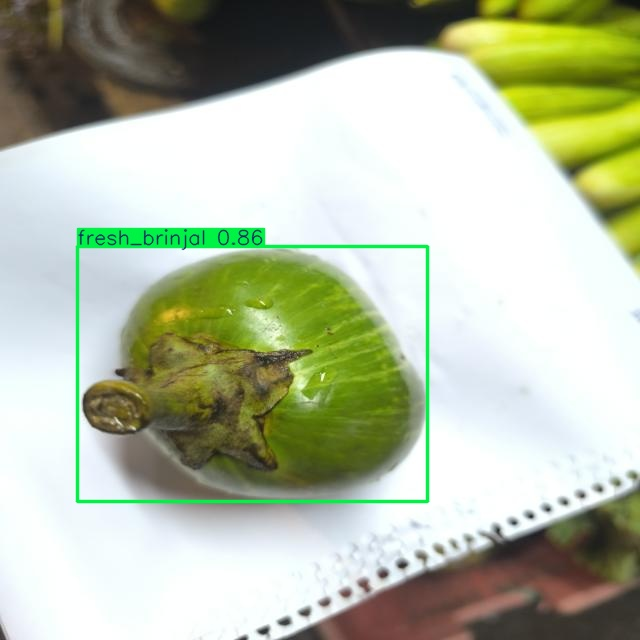

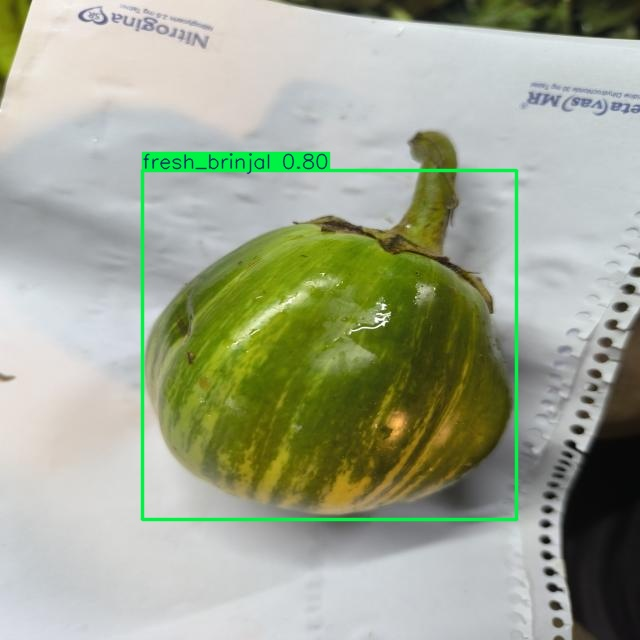

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[48:51]:
    display(IPyImage(filename=img, width=600))
    print("\n")